In [2]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import confusion_matrix


# Load Data



Git LFS files

In [2]:
import os
# Git LFS files
path = "./"
path = os.path.abspath(os.path.normpath(os.path.expanduser(path)))
print(path)

/Users/locc/Library/CloudStorage/OneDrive-TheUniversityofSydney(Students)/Binh-Coaching/Assignment/Ass-2/Project/notebooks


In [7]:
path =  "../datasets/bbc-fulltext/bbc/test"
!cd {path}
!git lfs pull

Not in a Git repository.


In [6]:
import pandas as pd
import os

data_path = "../datasets/bbc-fulltext/bbc/"
rows = []  # Use a list to store rows

for root, directories, files in os.walk(data_path):
    for filename in files:
        classname = os.path.basename(root)
        if classname in ['business', 'entertainment', 'politics', 'sport', 'tech']:
            _name = os.path.splitext(filename)[0]
            filepath = os.path.join(root, filename)
            with open(filepath, "r", encoding='latin-1') as f:
                content = f.read()
                content = " ".join(str(content).split())
            # Append the row as a dictionary to the list
            rows.append({'filename': _name, 'content': content, 'category': classname})

# Create a DataFrame from the list of rows
df_raw = pd.DataFrame(rows)

df_raw

,filename,content,category
0,289,version https://git-lfs.github.com/spec/v1 oid...,entertainment
1,262,version https://git-lfs.github.com/spec/v1 oid...,entertainment
2,276,version https://git-lfs.github.com/spec/v1 oid...,entertainment
3,060,version https://git-lfs.github.com/spec/v1 oid...,entertainment
4,074,version https://git-lfs.github.com/spec/v1 oid...,entertainment
...,...,...,...
2221,086,version https://git-lfs.github.com/spec/v1 oid...,tech
2222,253,version https://git-lfs.github.com/spec/v1 oid...,tech
2223,247,version https://git-lfs.github.com/spec/v1 oid...,tech
2224,290,version https://git-lfs.github.com/spec/v1 oid...,tech


In [4]:
df_raw.shape

(2226, 3)

In [5]:
df_raw = df_raw.drop('filename',1)
df_raw

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [52]:
train_df = pd.read_csv('../datasets/bbc-fulltext/bbc/trainingset.csv',sep='^',header=0)
test_df = pd.read_csv('../datasets/bbc-fulltext/bbc/test_groundtruth.csv',sep='^',header=0)

In [53]:
train_df.head()

,content,category
0,French boss to leave EADS The French co-head o...,business
1,"Gamers could drive high-definition TV, films, ...",tech
2,Stalemate in pension strike talks Talks aimed ...,politics
3,Johnny and Denise lose Passport Johnny Vaughan...,entertainment
4,Tautou 'to star in Da Vinci film' French actre...,entertainment


In [54]:
train_df['category'].unique()

array(['business', 'tech', 'politics', 'entertainment', 'sport'],
      dtype=object)

# Preprocess Data

In [1]:
# Preprocess Data
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer


In [ ]:
df 

In [ ]:
target = "category"
x = data.drop(target, axis= 1)
y = data[target]

In [3]:
train_df = pd.read_csv('/Users/locc/Documents/Binh-Coaching/Ass2/bbc-fulltext/bbc/trainingset.csv',sep='^',header=0)
test_df = pd.read_csv('/Users/locc/Documents/Binh-Coaching/Ass2/bbc-fulltext/bbc/test_groundtruth.csv',sep='^',header=0) 

In [ ]:
train_df.info()
test_df.info()
train_df.head()

In [7]:
target = "category"
x_train = train_df.drop(target, axis= 1)
y_train = train_df[target]

x_test = test_df.drop(target, axis= 1)
y_test = test_df[target]

In [24]:
# Build pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from sklearn.preprocessing import FunctionTransformer

def preprocess_text(text_series):
    lemmatizer = WordNetLemmatizer()
    
    def clean(text):
        text = str(text)  # ensure string
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        words = text.lower().split()
        lemmatized = [lemmatizer.lemmatize(word) for word in words]
        return ' '.join(lemmatized)

    return text_series.apply(clean)


# Define the text processing pipeline
text_pipeline = Pipeline([
    ('preprocess', FunctionTransformer(preprocess_text, validate=False)),
    ('tfidf', TfidfVectorizer(
        stop_words=stopwords.words("english"),
        ngram_range=(1, 2),
        min_df=0.01,
        max_df=0.99,
        smooth_idf=True
    ))
])

# Wrap in a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("content", text_pipeline, "content")
])

regs = Pipeline(steps=[
    ("preprocessing_data", preprocessor),
    ("classifier", RandomForestClassifier())
])

In [25]:
# train model
regs.fit(x_train, y_train)
preds = regs.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

               precision    recall  f1-score   support

     business       0.96      0.95      0.95       154
entertainment       0.97      0.97      0.97       120
     politics       0.95      0.96      0.96       125
        sport       0.98      1.00      0.99       150
         tech       0.95      0.94      0.95       119

     accuracy                           0.96       668
    macro avg       0.96      0.96      0.96       668
 weighted avg       0.96      0.96      0.96       668



2025-05-14 17:01:11.894 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 17:01:11.937 
  command:

    streamlit run /opt/anaconda3/envs/ts_anomaly/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-05-14 17:01:11.938 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 17:01:11.938 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 17:01:11.938 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 17:01:12.015 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 17:01:12.097 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 17:01:12.097 Thread

,precision,recall,f1-score,support
business,0.96,0.95,0.95,154.00
entertainment,0.97,0.97,0.97,120.00
politics,0.95,0.96,0.96,125.00
sport,0.98,1.00,0.99,150.00
tech,0.95,0.94,0.95,119.00
accuracy,0.96,0.96,0.96,0.96
macro avg,0.96,0.96,0.96,668.00
weighted avg,0.96,0.96,0.96,668.00


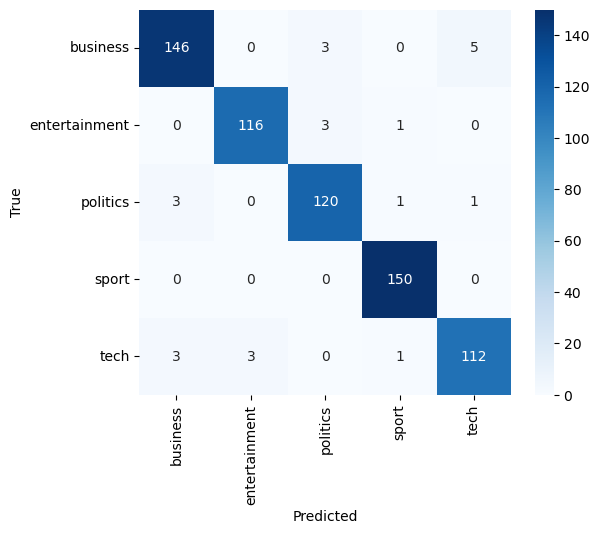

In [26]:
# Plot confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd
import streamlit as st

def plot_model_results(y_true, y_pred, labels=None):
    # Accuracy
    acc = accuracy_score(y_true, y_pred)
    st.markdown(f"### ✅ Accuracy: `{acc:.4f}`")

    # Confusion Matrix
    st.markdown("### 📉 Confusion Matrix")
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    fig, ax = plt.subplots(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    st.pyplot(fig)

    # Classification Report
    st.markdown("### 📊 Classification Report")
    report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)
    report_df = pd.DataFrame(report).transpose().round(2)
    st.dataframe(report_df.style.highlight_max(axis=0, color="lightgreen"))

    return report_df  # optional: return for further use


# Class labels (optional but improves readability)
unique_labels = sorted(set(y_test))  # or list of class names
plot_model_results(y_test, preds, labels=unique_labels)
